### Applied Data Science Capstone

This notebook would strictly be used for the applied data science capstone project which is part of the IBM Data Science Professional Certificate

In [14]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


###### Importing Scientific Computing and Visualization Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/Idris/Desktop/coursera/data/Data-Collisions.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


###### Data Cleaning

In [4]:
# check for sum of missing values
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

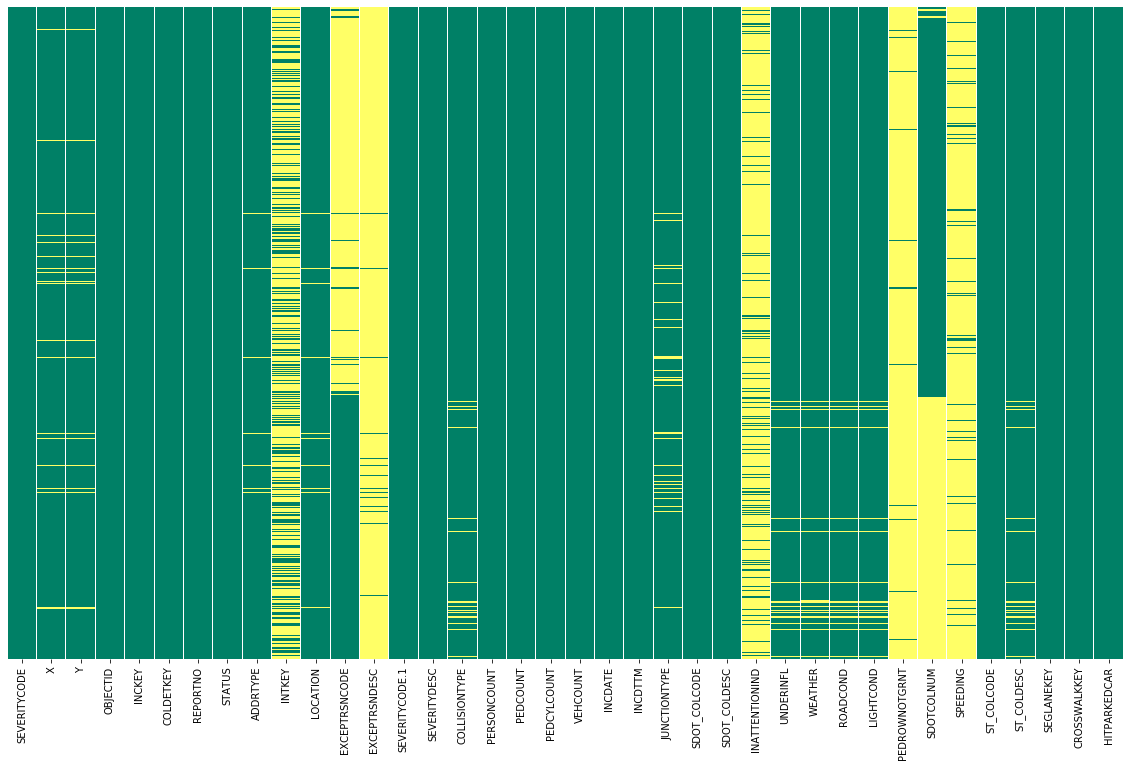

In [5]:
# visualizing dataset to see columns that have missing values
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [6]:
# drop features that have too many missing values
df.drop(labels=['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING'],
        axis=1, inplace=True)

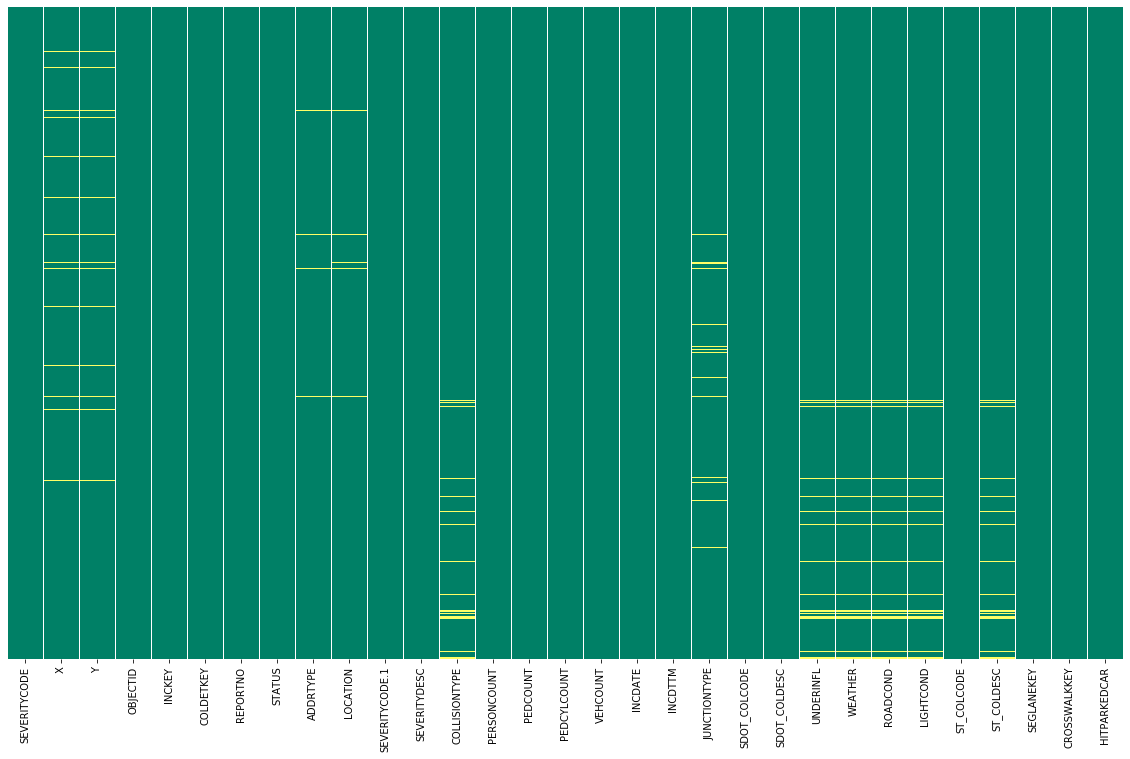

In [7]:
# revisualizing dataset to see new dataframe
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [8]:
# drop remaining missing values within dataframe since they are quite few
df.dropna(inplace=True)

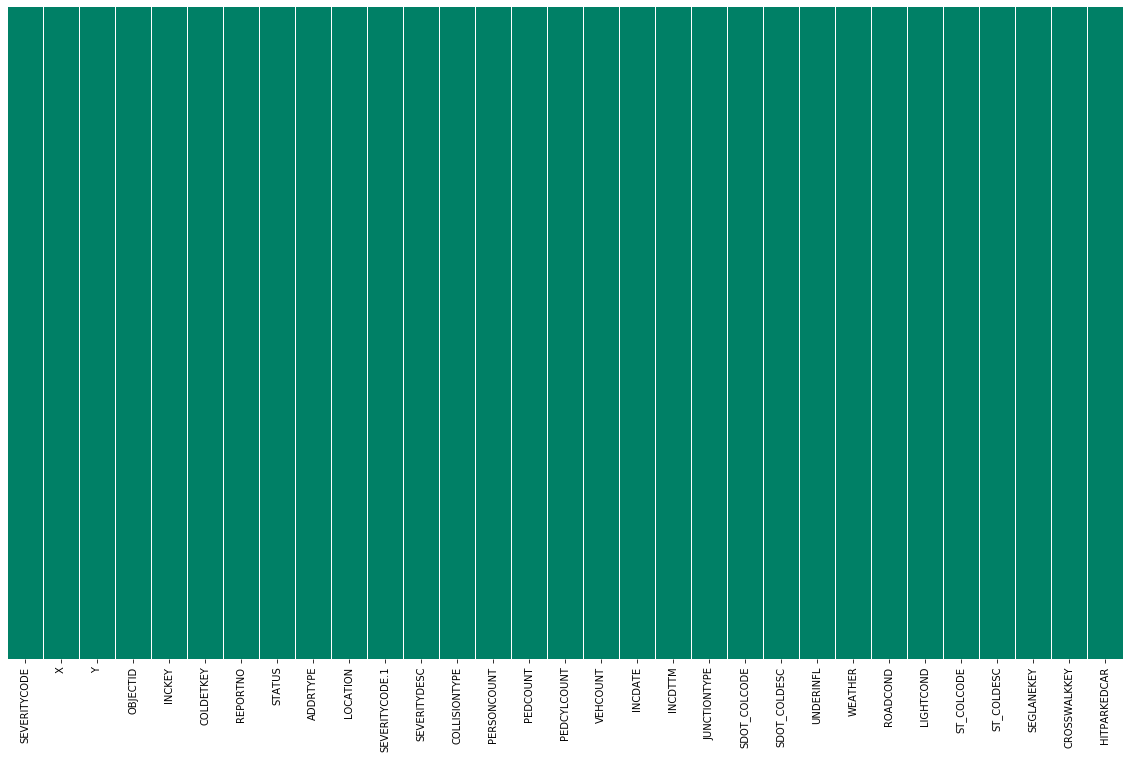

In [9]:
# revisualizing dataset to see new dataframe without missing values
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')
# new dataset does not contain any missing value

In [10]:
df.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
LOCATION          0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 31 columns):
SEVERITYCODE      180067 non-null int64
X                 180067 non-null float64
Y                 180067 non-null float64
OBJECTID          180067 non-null int64
INCKEY            180067 non-null int64
COLDETKEY         180067 non-null int64
REPORTNO          180067 non-null object
STATUS            180067 non-null object
ADDRTYPE          180067 non-null object
LOCATION          180067 non-null object
SEVERITYCODE.1    180067 non-null int64
SEVERITYDESC      180067 non-null object
COLLISIONTYPE     180067 non-null object
PERSONCOUNT       180067 non-null int64
PEDCOUNT          180067 non-null int64
PEDCYLCOUNT       180067 non-null int64
VEHCOUNT          180067 non-null int64
INCDATE           180067 non-null object
INCDTTM           180067 non-null object
JUNCTIONTYPE      180067 non-null object
SDOT_COLCODE      180067 non-null int64
SDOT_COLDESC      180067 non-null ob

###### Exploratory Data Analysis and Feature Selection

In [12]:
# drop these features since they were just descriptive columns
df.drop(labels=['SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC'],
       axis=1, inplace=True)

In [13]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [14]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.009376,0.019453,0.033295,0.033775,0.033765,1.000000,0.124056,0.246640,0.214972,-0.084710,0.167126,0.104207,0.175470
X,0.009376,1.000000,-0.160256,0.011103,0.010655,0.010641,0.009376,0.012834,0.010829,-0.002093,-0.015696,0.009627,-0.001763,0.014074
Y,0.019453,-0.160256,1.000000,-0.024478,-0.026877,-0.026890,0.019453,-0.013937,0.010783,0.027070,0.020340,-0.018722,0.004485,0.009917
OBJECTID,0.033295,0.011103,-0.024478,1.000000,0.949900,0.949375,0.033295,-0.050523,0.031925,0.041067,-0.016035,-0.014311,0.030974,0.060922
INCKEY,0.033775,0.010655,-0.026877,0.949900,1.000000,0.999996,0.033775,-0.050278,0.032627,0.038202,-0.015539,-0.011945,0.022377,0.052519
COLDETKEY,0.033765,0.010641,-0.026890,0.949375,0.999996,1.000000,0.033765,-0.050197,0.032622,0.038155,-0.015530,-0.011891,0.022257,0.052392
SEVERITYCODE.1,1.000000,0.009376,0.019453,0.033295,0.033775,0.033765,1.000000,0.124056,0.246640,0.214972,-0.084710,0.167126,0.104207,0.175470
PERSONCOUNT,0.124056,0.012834,-0.013937,-0.050523,-0.050278,-0.050197,0.124056,1.000000,-0.027883,-0.043511,0.394979,-0.165458,-0.023215,-0.035761
PEDCOUNT,0.246640,0.010829,0.010783,0.031925,0.032627,0.032622,0.246640,-0.027883,1.000000,-0.018946,-0.321795,0.279085,0.001337,0.572838
PEDCYLCOUNT,0.214972,-0.002093,0.027070,0.041067,0.038202,0.038155,0.214972,-0.043511,-0.018946,1.000000,-0.311533,0.412626,0.455445,0.109145


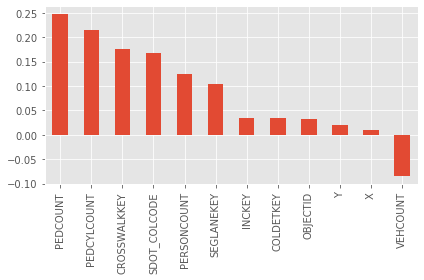

In [15]:
plt.style.use('ggplot')
# bar graph showing correlation of label and numerical independent variables
df.corr().loc['SEVERITYCODE'].sort_values(ascending=False)[2:].plot.bar()
# as seen in the plot non of the numerical variables have neither positive correlation (>0.4) nor negative correlation (>-0.4)
# since none of the numerical columns have any correlation we drop them as shown in the next cell
plt.tight_layout()
# plt.savefig('Correlation.jpg',dpi=200)

The pearson correlation of the PEDCOUNT feature is 0.2466400115122333 with a p-value of 0.0


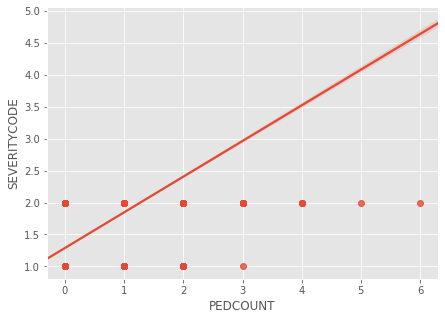

In [16]:
plt.figure(figsize=(7,5))
# examining relationship between pedestrian count and label
sns.regplot(x='PEDCOUNT',y='SEVERITYCODE',data=df)
# importing scipy library to get pearson correlation coefficient and p-value
from scipy import stats
pearson_coeff, p_value = stats.pearsonr(df['PEDCOUNT'],df['SEVERITYCODE'])
print('The pearson correlation of the PEDCOUNT feature is', pearson_coeff, 'with a p-value of', p_value)
# plt.savefig('pedcount.jpg',dpi=200)

The pearson correlation of the PEDCYLCOUNT feature is 0.2149722383113905 with a p-value of 0.0


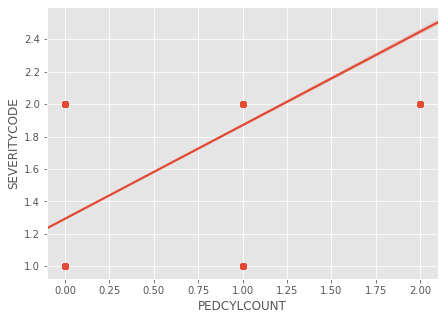

In [17]:
plt.figure(figsize=(7,5))
# examining relationship between pedestrian count and label
sns.regplot(x='PEDCYLCOUNT',y='SEVERITYCODE',data=df)
# importing scipy library to get pearson correlation coefficient and p-value
from scipy import stats
pearson_coeff, p_value = stats.pearsonr(df['PEDCYLCOUNT'],df['SEVERITYCODE'])
print('The pearson correlation of the PEDCYLCOUNT feature is', pearson_coeff, 'with a p-value of', p_value)
# plt.savefig('pedcylcount.jpg',dpi=200)

In [18]:
# the numerical columns showed no correlation hence we drop them
df.select_dtypes('int64').columns

Index(['SEVERITYCODE', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY'],
      dtype='object')

In [19]:
# getting numerical columns to drop them
df.select_dtypes('float64').columns

Index(['X', 'Y'], dtype='object')

In [20]:
df.drop(labels=['OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1',
               'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE',
               'SEGLANEKEY', 'CROSSWALKKEY','X', 'Y'], axis=1, inplace=True)

In [21]:
df.columns

Index(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 15 columns):
SEVERITYCODE     180067 non-null int64
REPORTNO         180067 non-null object
STATUS           180067 non-null object
ADDRTYPE         180067 non-null object
LOCATION         180067 non-null object
COLLISIONTYPE    180067 non-null object
INCDATE          180067 non-null object
INCDTTM          180067 non-null object
JUNCTIONTYPE     180067 non-null object
UNDERINFL        180067 non-null object
WEATHER          180067 non-null object
ROADCOND         180067 non-null object
LIGHTCOND        180067 non-null object
ST_COLCODE       180067 non-null object
HITPARKEDCAR     180067 non-null object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


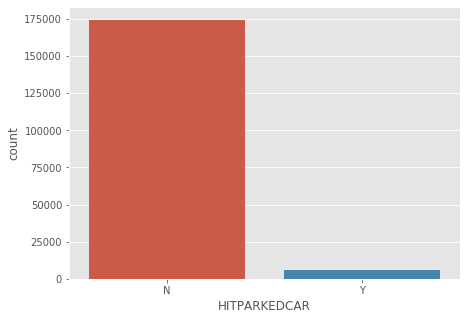

In [23]:
# visualizing count values of hit parked cars
plt.figure(figsize=(7,5))
sns.countplot(x='HITPARKEDCAR',data=df)
# plt.savefig('hitparkedcar.jpg',dpi=200)
# the visualization shows too much bias and wouldn'be good for the model

In [24]:
# drop HITPARKEDCAR column
df.drop('HITPARKEDCAR', axis=1, inplace=True)

In [25]:
df.columns

Index(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE'],
      dtype='object')

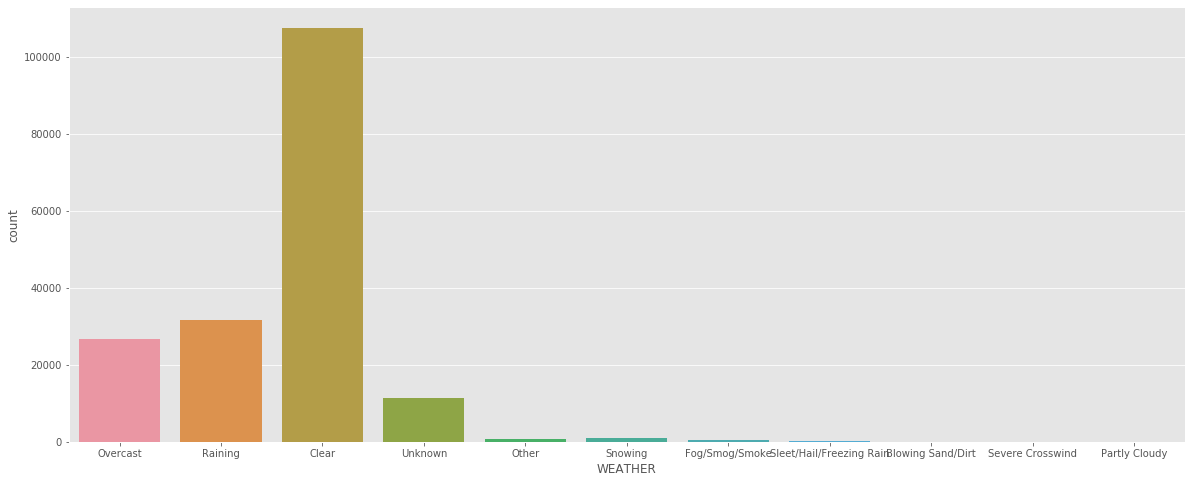

In [26]:
#  visualizing count values of weather conditions
#  ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']
plt.figure(figsize=(20,8))
sns.countplot(x='WEATHER',data=df)
# plt.savefig('weather.jpg',dpi=200)

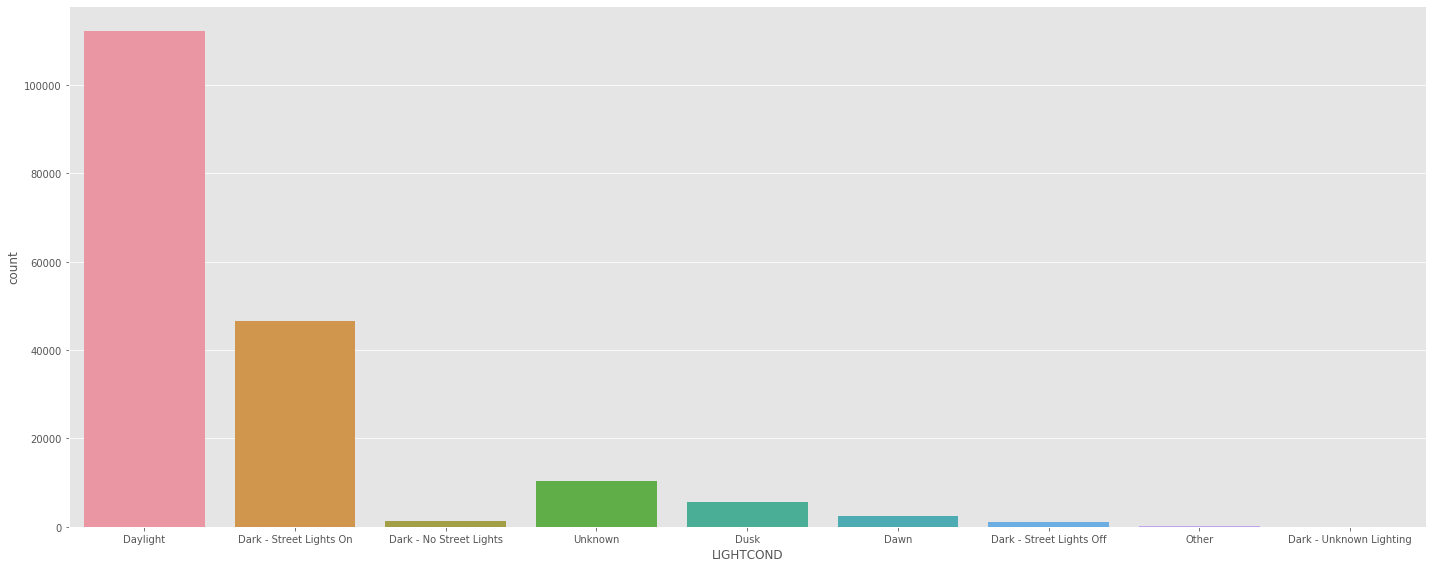

In [27]:
#  visualizing count values of light conditions
plt.figure(figsize=(20,8))
sns.countplot(x='LIGHTCOND',data=df)
plt.tight_layout()
# plt.savefig('lightcond.jpg',dpi=200)

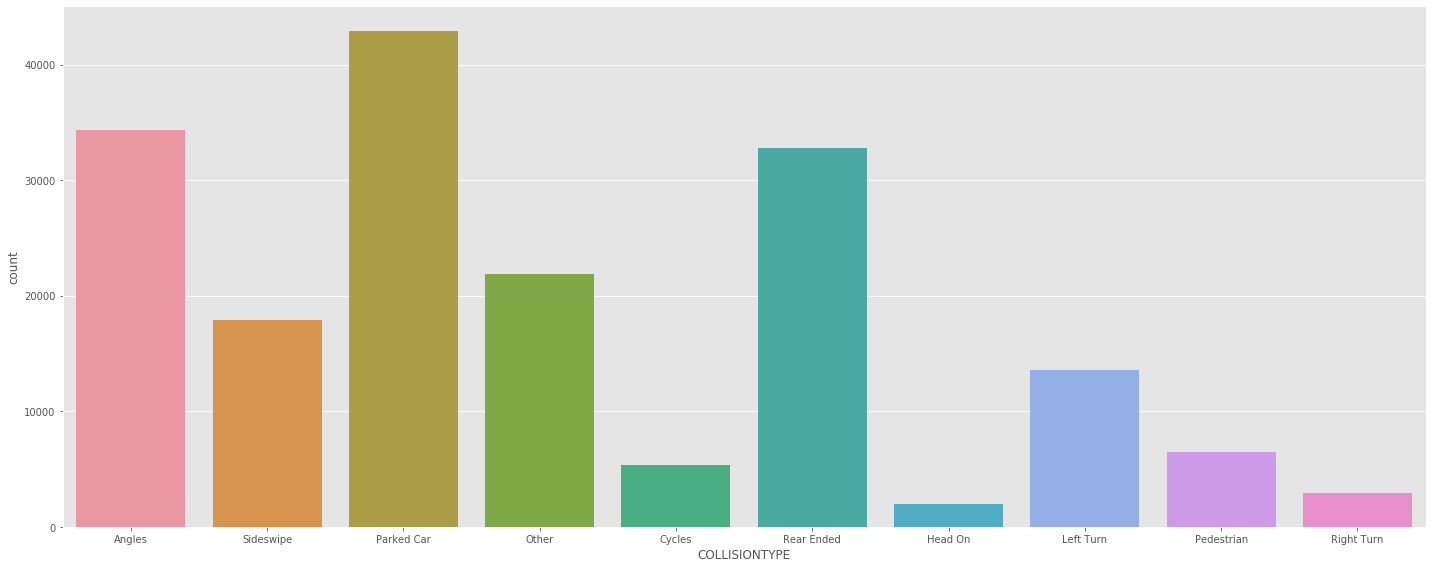

In [28]:
#  visualizing count values of light conditions
plt.figure(figsize=(20,8))
sns.countplot(x='COLLISIONTYPE',data=df)
plt.tight_layout()
# plt.savefig('collision.jpg',dpi=200)

In [29]:
df.columns

Index(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE'],
      dtype='object')

In [30]:
# removing irrelevant features
df.drop(labels = ['REPORTNO','STATUS','ADDRTYPE','LOCATION',
                  'INCDATE','INCDTTM','UNDERINFL', 'ST_COLCODE',], 
                  axis=1, inplace=True)

In [31]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Angles,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Parked Car,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Other,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Angles,At Intersection (intersection related),Raining,Wet,Daylight


In [32]:
df.shape

(180067, 6)

In [33]:
df.columns

Index(['SEVERITYCODE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

###### Creating dummy variables

In [34]:
# the data now contains the label and independent variables, however these variables need to be one-hot encoded for the model
# create a list of all features to be one-hot encoded
to_dummy = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

In [35]:
# get the dummy variables and assign to a new variable titled final_data
final_data = pd.get_dummies(df,columns=to_dummy,drop_first=True)

In [36]:
final_data.head()

,SEVERITYCODE,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,...,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [37]:
final_data.shape

(180067, 42)

###### Splitting data into train and test sets

In [38]:
# now that we have our final data set we can split our data into train and test sets
from sklearn.model_selection import train_test_split
X = final_data.drop('SEVERITYCODE',axis=1)
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [39]:
print(X_train.shape)
print(y_train.shape)

(126046, 41)
(126046,)


In [40]:
print(X_test.shape)
print(y_test.shape)

(54021, 41)
(54021,)


###### Building Decision Tree Model

In [41]:
# now that we have our final data set we can build our model
# import model from sklearn library
from sklearn.tree import DecisionTreeClassifier
# next we create an instance of our model
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [42]:
# next we fit our training data to the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

###### Predictions using decision trees

In [43]:
# predict using test set
dtree_predictions = dtree.predict(X_test)

###### Decision Tree Evaluation

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [45]:
# classification report
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           1       0.73      0.99      0.84     37337
           2       0.89      0.19      0.31     16684

    accuracy                           0.74     54021
   macro avg       0.81      0.59      0.58     54021
weighted avg       0.78      0.74      0.68     54021



In [46]:
# confusion matrix
print(confusion_matrix(y_test,dtree_predictions))

[[36934   403]
 [13530  3154]]


In [47]:
# model accuracy score
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test,dtree_predictions))

Decision Trees's Accuracy:  0.7420817830103108


###### Building Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

###### Predictions using logistic regression

In [51]:
lr_predictions = lr.predict(X_test)

###### Logistic Regression Evaluation

In [52]:
# classification report
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

           1       0.73      0.99      0.84     37337
           2       0.89      0.19      0.31     16684

    accuracy                           0.74     54021
   macro avg       0.81      0.59      0.58     54021
weighted avg       0.78      0.74      0.68     54021



In [53]:
# confusion matrix
print(confusion_matrix(y_test,lr_predictions))

[[36932   405]
 [13526  3158]]


In [54]:
# model accuracy score
print("Logistic regression's Accuracy: ", metrics.accuracy_score(y_test,lr_predictions))

Logistic regression's Accuracy:  0.7421188056496547


###### Building SVM Model

In [55]:
from sklearn.svm import SVC

In [56]:
svc_model = SVC(kernel='rbf')

In [57]:
svc_model.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

###### Predictions using SVM

In [58]:
svc_predictions = svc_model.predict(X_test)

###### SVM Evaluation

In [59]:
# confusion matrix
print(confusion_matrix(y_test,svc_predictions))

[[36934   403]
 [13529  3155]]


In [60]:
# classification report
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           1       0.73      0.99      0.84     37337
           2       0.89      0.19      0.31     16684

    accuracy                           0.74     54021
   macro avg       0.81      0.59      0.58     54021
weighted avg       0.78      0.74      0.68     54021



In [61]:
# model accuracy score
print("SVC model's Accuracy: ", metrics.accuracy_score(y_test,svc_predictions))

SVC model's Accuracy:  0.7421002943299828


###### Computing AUROC values

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
dtree_auc = roc_auc_score(y_test, dtree_predictions)
lr_auc = roc_auc_score(y_test, lr_predictions)
svm_auc = roc_auc_score(y_test, svc_predictions)

###### Print AUROC scores

In [80]:
print('Decision Tree: AUROC = %.3f' % (dtree_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('SVM: AUROC = %.3f' % (svm_auc))

Decision Tree: AUROC = 0.589
Logistic Regression: AUROC = 0.589
SVM: AUROC = 0.589
